In [5]:
import pandas as pd
import os

In [6]:
print(os.getcwd())

c:\Users\Basit Akram\Documents\new-project\notebooks


In [11]:
df = pd.read_csv("..\input\cat_train.csv")
df.shape

(600000, 25)

In [16]:
df.value_counts()

id      bin_0  bin_1  bin_2  bin_3  bin_4  nom_0  nom_1      nom_2    nom_3       nom_4     nom_5      nom_6      nom_7      nom_8      nom_9      ord_0  ord_1        ord_2     ord_3  ord_4  ord_5  day  month  target
0       0.0    0.0    0.0    F      N      Red    Trapezoid  Hamster  Russia      Bassoon   de4c57ee2  a64bc7ddf  598080a91  0256c7a4b  02e7c8990  3.0    Contributor  Hot       c      U      Pw     6.0  3.0    0         1
400562  1.0    0.0    0.0    T      N      Red    Polygon    Lion     Costa Rica  Theremin  f9b3e0dea  2164ec231  e60e65034  8aeac2495  bab4168bc  3.0    Expert       Freezing  h      C      iv     3.0  3.0    0         1
400517  0.0    1.0    0.0    F      N      Blue   Circle     Lion     Costa Rica  Theremin  85a6451f9  7107784ee  00a7f9a05  3d70f650d  e4f2ae942  3.0    Novice       Lava Hot  f      P      ok     6.0  6.0    1         1
400515  0.0    0.0    0.0    T      N      Green  Triangle   Hamster  India       Bassoon   10b9390a9  18f07c7da  688

In [12]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [ ]:
df["target"].describe()

count    600000.000000
mean          0.187205
std           0.390076
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

<AxesSubplot:>

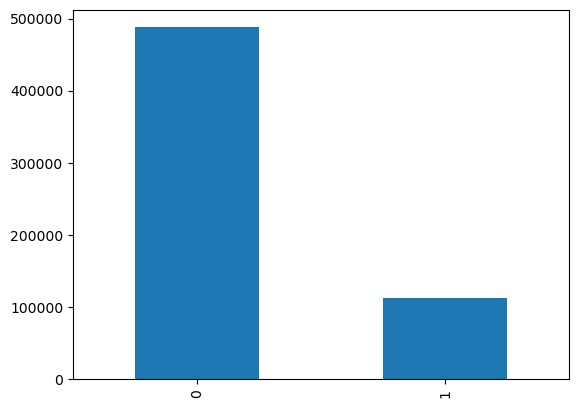

In [ ]:
df["target"].value_counts().plot(kind='bar')

In [ ]:
df["ord_2"].value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

# Label Encoding

## Label Encoding -- Hardcoding

In [ ]:
# Label Encoding
mapping = {
    "Freezing": 0,
    "Warm": 1,
    "Cold": 2,
    "Boiling Hot": 3,
    "Hot": 4,
    "Lava Hot": 5
}

In [ ]:
df.loc[:,"ord_2"] = df.ord_2.map(mapping)

In [ ]:
df.ord_2.value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

## Label Encoding -- scikit learn

In [ ]:
from sklearn import preprocessing

# read the data
df = pd.read_csv("input/cat_train.csv")

# fill NaN values in ord_2 column
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")

# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()

# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)

In [ ]:
import numpy as np

# create an example feature matrix

example = np.array(
    [
        [0, 0, 1],
        [1, 0 ,0],
        [1, 0, 1]
    ]
)

# print size in bytes
print(example.nbytes)

36


In [ ]:
import numpy as np
from scipy import sparse

# create our example feature matrix
example = np.array(
    [
        [0, 0, 1],
        [1, 0 ,0],
        [1, 0, 1]
    ]
)

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
print(sparse_example)
# print size of this sparse matrix
print(sparse_example.data.nbytes)

print(sparse_example.data.nbytes +
      sparse_example.indptr.nbytes +
      sparse_example.indices.nbytes
)

  (0, 2)	1
  (1, 0)	1
  (2, 0)	1
  (2, 2)	1
16
48


In [ ]:
# the difference becomes vast when we have much larger array, let's say with thousands
# of samples and tens of thousands of features.

import numpy as np
from scipy import sparse

# number of rows
n_rows = 100

# number of columns
n_cols = 1000

# create a random binary matrix with only 5% values as 1s
example = np.random.binomial(1, p=0.05, size=(n_rows, n_cols))
# print size in bytes
print(f"Size of dense array: {example.nbytes}")

# convert numpy array to sparse CSR matrix
sparse_example =  sparse.csr_matrix(example)

# print size of this sparse matrix
print(f"Size of sparse array :{sparse_example.data.nbytes}")

full_size = (
    sparse_example.data.nbytes +
    sparse_example.indptr.nbytes +
    sparse_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 400000
Size of sparse array :20156
Full size of sparse array: 40716


# One Hot Encoding

In [ ]:
import numpy as np
from scipy import sparse
# create binary matrix

example = np.array(
    [
        [0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]
    ]
)

# print size in bytes
print(f"Size of dense array: {example.nbytes}")

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size of this sparse matrix
print(f"Size of sparse array:{sparse_example.data.nbytes}")

full_size = (sparse_example.data.nbytes +
      sparse_example.indptr.nbytes +
      sparse_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 72
Size of sparse array:12
Full size of sparse array: 40


In [ ]:
# OneHotEncoder from scikit-learn to transform our feature array with 1001 categories into dense and sparse matrices
import numpy as np
from sklearn import preprocessing

# create random 1-d array with 1001 different categories (int)
example = np.random.randint(1000, size=100)

# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array
ohe = preprocessing.OneHotEncoder(sparse=False)

# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1,1))

# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")

# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse=True)

# fit and transform data with sparse one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1,1))

# print size of this sparse matrix
print(f"Size of sparse array:{ohe_example.data.nbytes}")

full_size = (
    ohe_example.data.nbytes +
    ohe_example.indptr.nbytes +
    ohe_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 76000
Size of sparse array:800
Full size of sparse array: 1604


In [ ]:
df [df.ord_2 == "Boiling_Hot"].shape

(0, 25)

In [ ]:
df.groupby(["ord_2"])["id"].count() #sorted with id name in lexicographical order

ord_2
0     84790
1     97822
2    142726
3     67508
4     64840
5     18075
6    124239
Name: id, dtype: int64

In [ ]:
df["ord_2"].value_counts() #sorted in descending order

2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: ord_2, dtype: int64

In [ ]:
# If we just replace ord_2 column with its count values, we have converted it to a feature which is kind of numerical row.
df.groupby(["ord_2"])["id"].transform("count")

0          67508
1         124239
2         142726
3          64840
4          97822
           ...  
599995    142726
599996     84790
599997    142726
599998    124239
599999     84790
Name: id, Length: 600000, dtype: int64

In [ ]:
df = pd.read_csv("input/cat_train.csv")

In [ ]:
df.groupby([
    "ord_1",
    "ord_2"
])["id"].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,Boiling Hot,15634
1,Contributor,Cold,17734
2,Contributor,Freezing,26082
3,Contributor,Hot,12428
4,Contributor,Lava Hot,11919
5,Contributor,Warm,22774
6,Expert,Boiling Hot,19477
7,Expert,Cold,22956
8,Expert,Freezing,33249
9,Expert,Hot,15792


In [ ]:
df = pd.read_csv("input/cat_train.csv")

In [ ]:
# create new features from these categorical variables
df["new_feature"]=(
     df.ord_1.astype(str)
    + "_"
    +df.ord_2.astype(str)
)
df.new_feature

0                 Contributor_Hot
1                Grandmaster_Warm
2                    nan_Freezing
3                 Novice_Lava Hot
4                Grandmaster_Cold
                   ...           
599995            Novice_Freezing
599996         Novice_Boiling Hot
599997       Contributor_Freezing
599998                Master_Warm
599999    Contributor_Boiling Hot
Name: new_feature, Length: 600000, dtype: object

In [ ]:
df["new_feature"]=(
     df.ord_1.astype(str)
    + "_"
    +df.ord_2.astype(str)
    +"_"
    +df.ord_3.astype(str)
)
df.new_feature

0                 Contributor_Hot_c
1                Grandmaster_Warm_e
2                    nan_Freezing_n
3                 Novice_Lava Hot_a
4                Grandmaster_Cold_h
                    ...            
599995            Novice_Freezing_a
599996         Novice_Boiling Hot_n
599997       Contributor_Freezing_n
599998                Master_Warm_m
599999    Contributor_Boiling Hot_b
Name: new_feature, Length: 600000, dtype: object

In [ ]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [ ]:
df.ord_2.fillna("None").value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
None            18075
Name: ord_2, dtype: int64

In [ ]:
# code after figure 4
import pandas as pd
from sklearn import preprocessing

# read training data
train = pd.read_csv("input/cat_train.csv")

# read test data
test = pd.read_csv("input/cat_test.csv")

# create a fake target column for test data
# since this column doesn't exist
test.loc[:,"target"] = -1

# concatenate both training and test data
data=pd.concat([train,test]).reset_index(drop=True)

# print(train.shape)
# print(test.shape)
# print(data.shape)

# make a list of features we are interested in 
# id and target is something we should not encode
features = [x for x in train.columns if x not in ["id", "target"]]

# loop over the features list

for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()

    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!
    temp_col = data[feat].fillna("NONE").astype(str).values

    # we can use fit_transform here as we do not
    # have any extra test data that we need to 
    # transfrom on separately
    data.loc[:,feat] = lbl_enc.fit_transform(temp_col)

# split the training and test data again
train = data[data.target !=-1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)



In [ ]:
df.ord_4.fillna("NONE").value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

In [ ]:
# df = pd.read_csv("input/cat_train.csv")
# df.ord_4.fillna("NONE")
# df.loc[ df["ord_4"].value_counts()[df["ord_4"]].values < 2000, "ord_4" ] = "RARE"
# df.ord_4.value_counts()

In [ ]:
df = pd.read_csv("input/cat_train.csv")
df.ord_4.fillna("NONE")

frequencies = df["ord_4"].value_counts()
condition = frequencies < 2000
mask_obs = frequencies[condition].index
mask_dict = dict.fromkeys(mask_obs,'RARE')
df["ord_4"] = df["ord_4"].replace(mask_dict)

In [ ]:
df["ord_4"].value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: ord_4, dtype: int64

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("input/cat_train_folds.csv")

In [ ]:
df.kfold.value_counts()

0    120000
1    120000
2    120000
3    120000
4    120000
Name: kfold, dtype: int64

In [ ]:
# check target distribution per fold
df[df.kfold==0].target.value_counts()

0    97536
1    22464
Name: target, dtype: int64

In [ ]:
# check target distribution per fold
df[df.kfold==1].target.value_counts()

0    97536
1    22464
Name: target, dtype: int64

In [ ]:
# check target distribution per fold
df[df.kfold==2].target.value_counts()

0    97535
1    22465
Name: target, dtype: int64

In [ ]:
# check target distribution per fold
df[df.kfold==3].target.value_counts()

0    97535
1    22465
Name: target, dtype: int64

In [ ]:
# check target distribution per fold
df[df.kfold==4].target.value_counts()

0    97535
1    22465
Name: target, dtype: int64

In [ ]:
df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target', 'kfold'],
      dtype='object')

In [ ]:
[f for f in df.columns if f not in ("id", "target", "kfold")]

['bin_0',
 'bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'nom_5',
 'nom_6',
 'nom_7',
 'nom_8',
 'nom_9',
 'ord_0',
 'ord_1',
 'ord_2',
 'ord_3',
 'ord_4',
 'ord_5',
 'day',
 'month']